In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.read_csv("auto.csv")
import statsmodels.api as sm

In [2]:
df.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [3]:
df.shape

(392, 8)

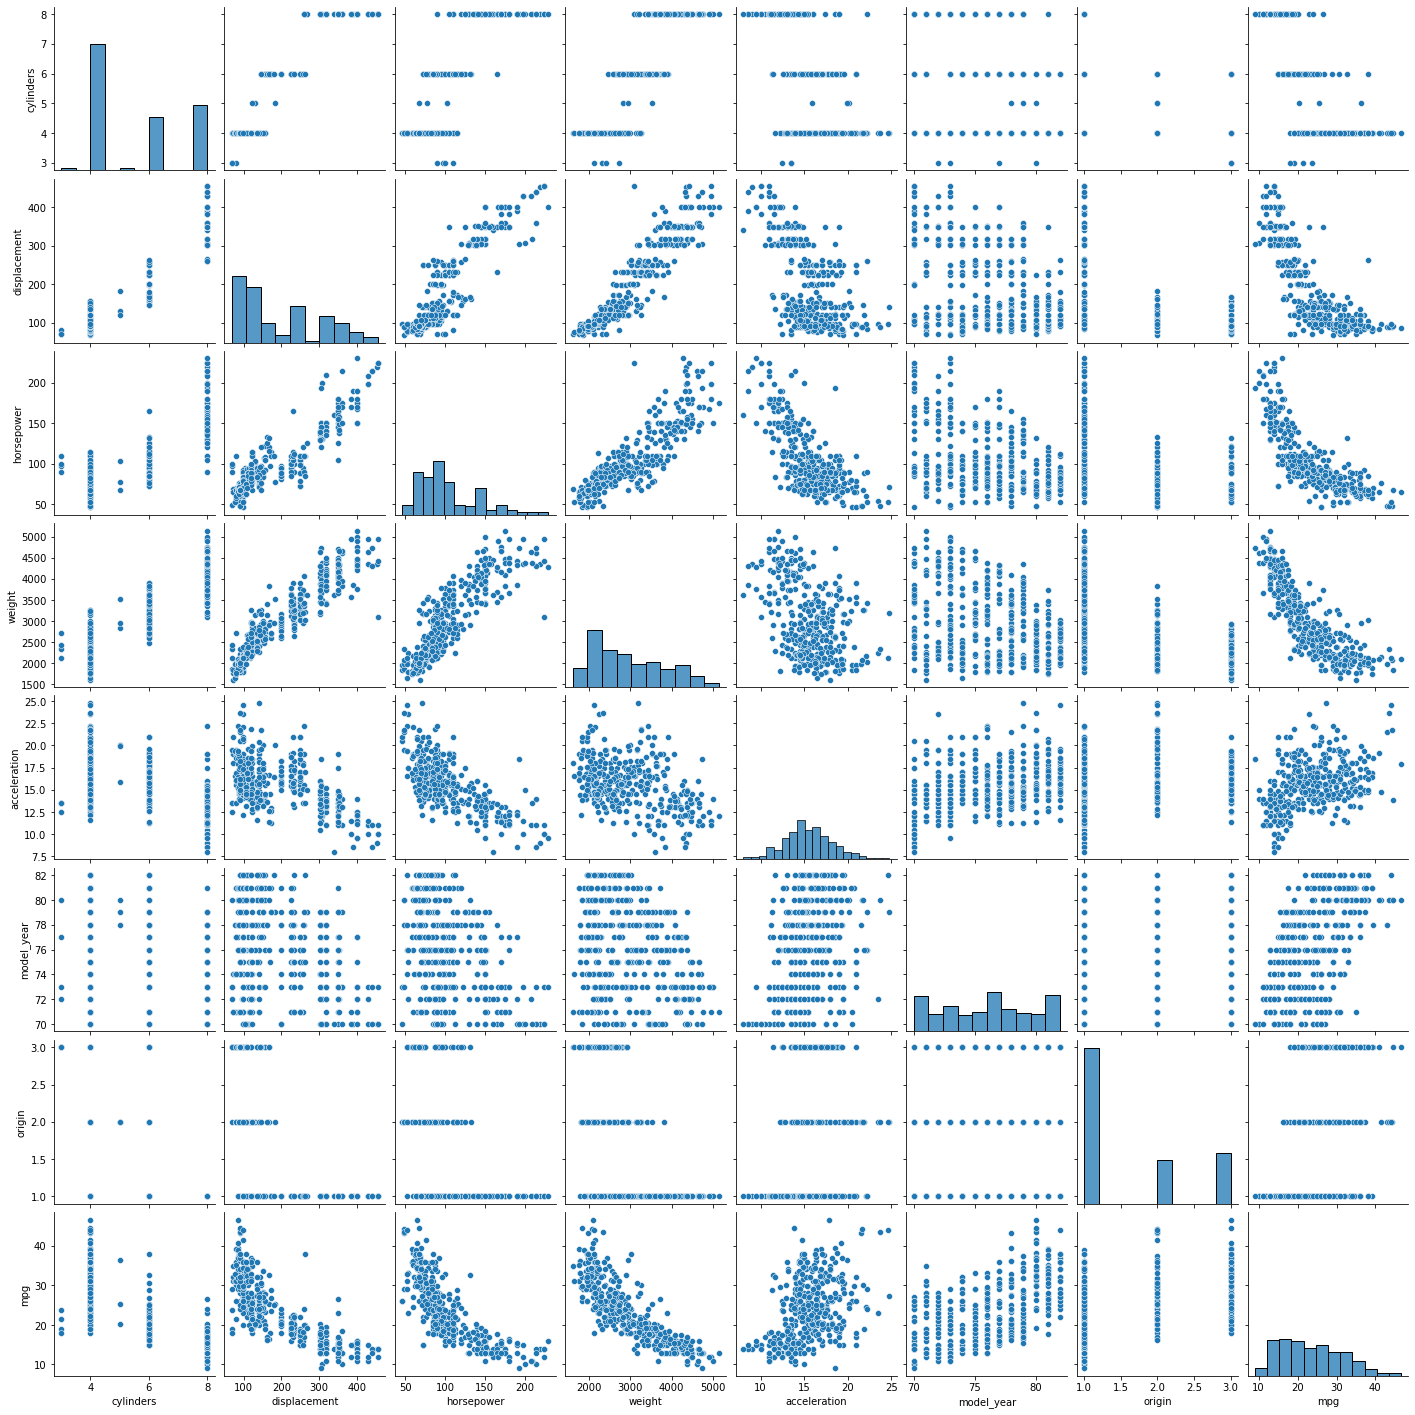

In [4]:
sb.pairplot(df)

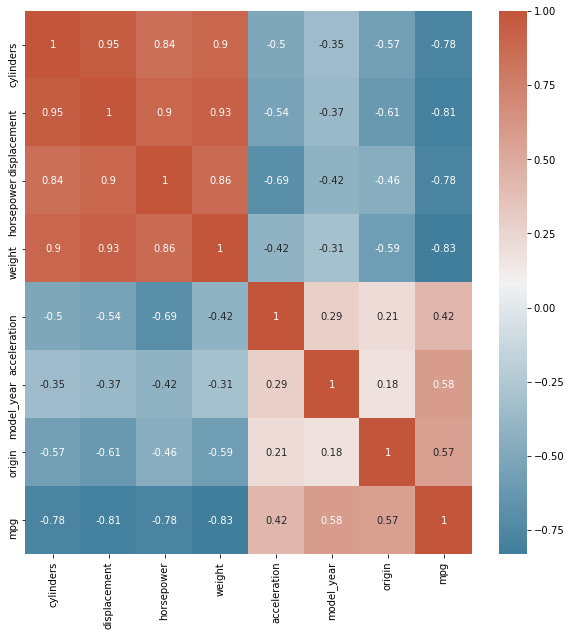

In [5]:
corr_m=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
                               
cmap = sb.diverging_palette(230,20,as_cmap=True)
sb.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()

In [6]:
corr_m['cylinders'].sort_values(ascending=False)

cylinders       1.000000
displacement    0.950823
weight          0.897527
horsepower      0.842983
model_year     -0.345647
acceleration   -0.504683
origin         -0.568932
mpg            -0.777618
Name: cylinders, dtype: float64

In [7]:
y=df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [8]:
df.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')

In [9]:
df=df.drop('mpg', axis=1)

In [10]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [12]:
reg.fit(df,y)

LinearRegression()

In [13]:
reg.coef_.astype(np.float64)

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

In [14]:
reg.intercept_

-17.21843462201758

In [15]:
result = sm.OLS(y, df).fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:57:07   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
model_year       0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#parameters with high correlation
result.pvalues[result.pvalues < 0.05].sort_values()

model_year      4.169891e-79
weight          1.481849e-18
origin          4.296529e-06
horsepower      1.776088e-03
displacement    4.318785e-03
cylinders       2.975467e-02
dtype: float64

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 17,17

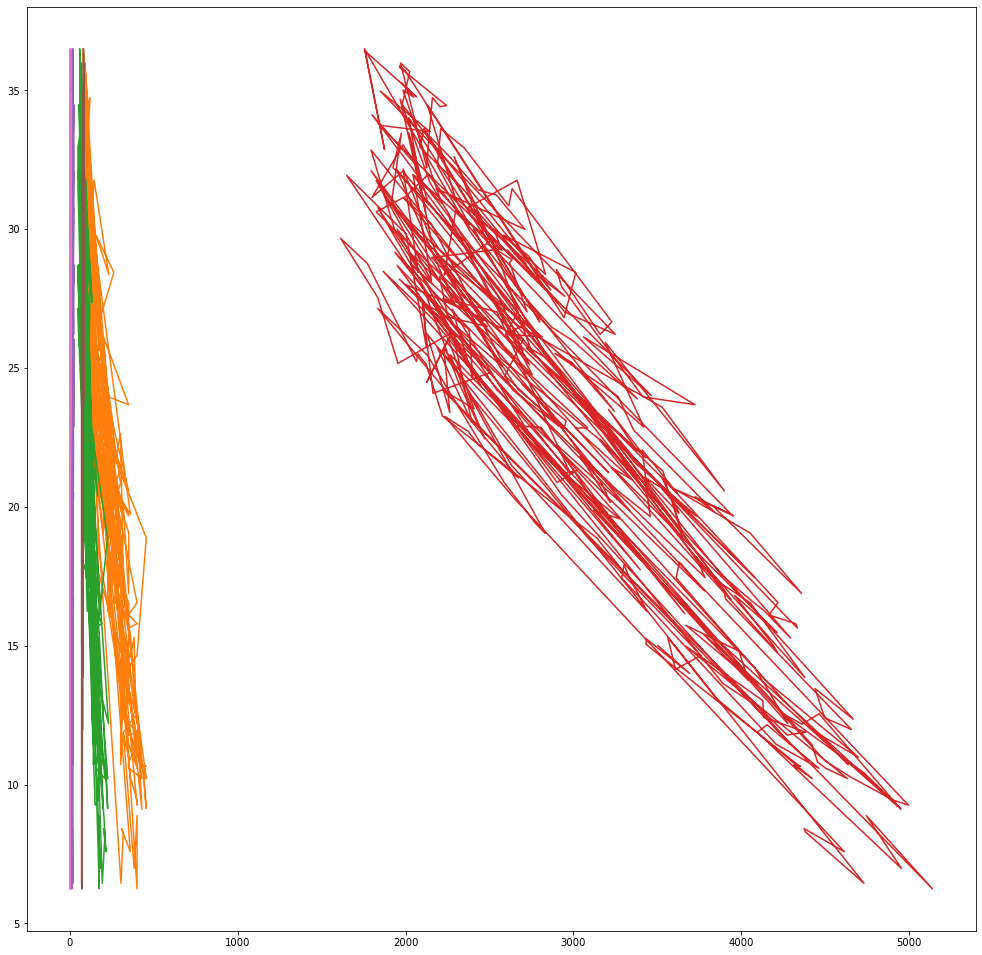

In [19]:
y_pred=reg.predict(df)
plt.plot(df,y_pred)

In [20]:
#above only variability due to red line and some due to orange
#parameters with high correlation cause this
result.pvalues[result.pvalues < 0.05].sort_values()

model_year      4.169891e-79
weight          1.481849e-18
origin          4.296529e-06
horsepower      1.776088e-03
displacement    4.318785e-03
cylinders       2.975467e-02
dtype: float64

In [21]:
x=df["weight"]
reg.fit(pd.DataFrame(x),pd.DataFrame(y))

LinearRegression()

In [22]:
reg.score(pd.DataFrame(x),pd.DataFrame(y))

0.6926304331206254

In [23]:
y_pred=reg.predict(pd.DataFrame(x))

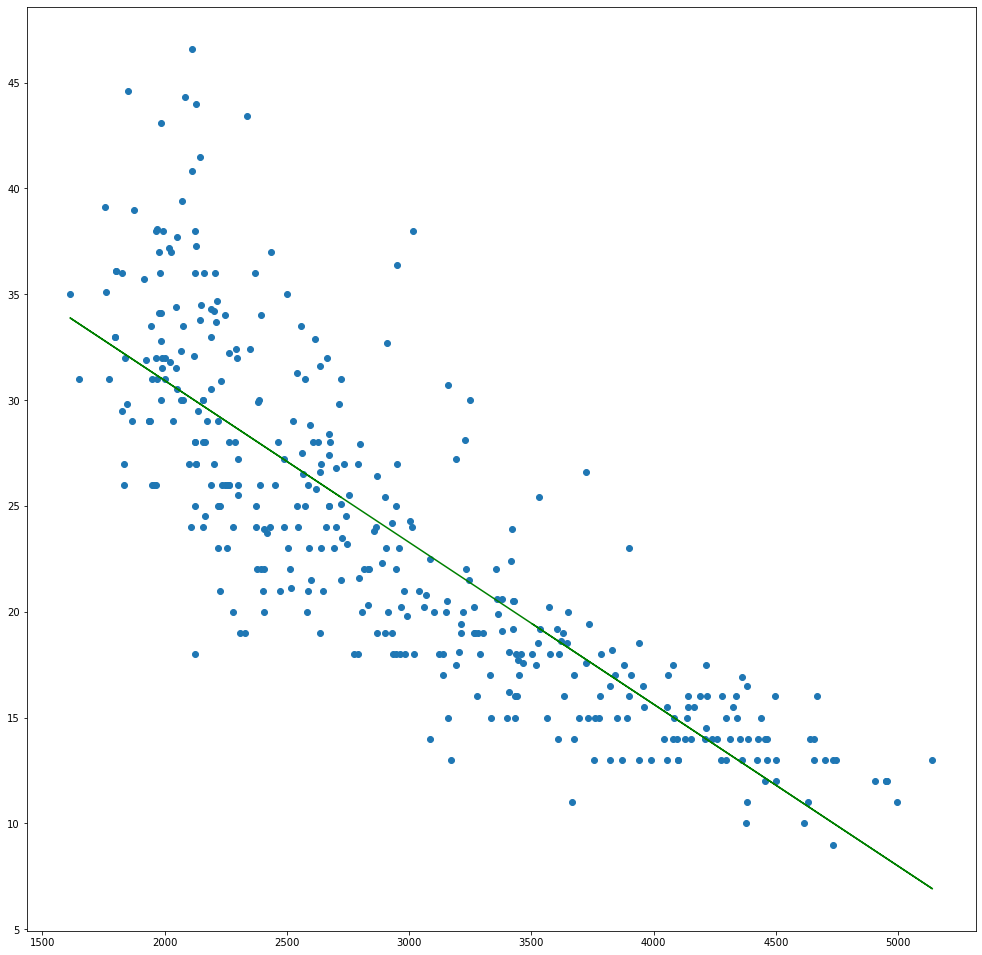

In [24]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='green')